In [1]:
import pandas as pd
import numpy as np
import os
os.chdir("C:\\Users\\Sandeep\\Practice\\Linear_regression\\src")
import linear_reg_v1 

C:\Users\Sandeep\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv("C:\\Users\\Sandeep\\Practice\\Linear_regression\\train.csv")

In [3]:
data.shape

(1460, 81)

In [4]:
target = 'SalePrice'
floor_list = [1,5,10]
cap_list = [99,95,90]
transformation_list = ["None",'sqaure','cube','sqrt','log']
pd.set_option('display.max_rows',None)

### Drp if missing value % is gretaer than 75%

In [5]:
##### Perctage of Null
missing_value_info =(data.isna().sum()/data.shape[0])*100
drop_col = list(missing_value_info[missing_value_info>75].index)
print(drop_col)

['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [6]:
data_2 = data.drop(columns = drop_col)
data.shape, data_2.shape

((1460, 81), (1460, 77))

In [7]:
var_list = list(data_2.columns)
var_list.remove(var_list[-1])
num_var = list(data_2.select_dtypes(include=['int64', 'float64']).columns)
num_var.remove(num_var[-1])
cat_var = [var for var in var_list if var not in num_var]

### check stndard deviation of numerical variable

In [8]:
std_deviation = data_2[num_var].std()
col_with_sero_std_dev = std_deviation[std_deviation==0]
len (col_with_sero_std_dev)

0

In [9]:
#### check for categorical variable if unique is 1 or gretaer than 20 then drop
unique_num = data_2[cat_var].nunique()
drop_col = list(unique_num[(unique_num>20) |(unique_num==1)].index)
drop_col

['Neighborhood']

In [10]:
data_3 = data_2.drop(columns = drop_col)

In [11]:
df = data_3.copy()
impute_mv_cont,impute_mv_cat = linear_reg_v1.missing_value_treatment(df,target)

['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']


In [12]:
impute_mv_cont

{'LotFrontage': 66.00833333333334,
 'MasVnrArea': 264.71724137931034,
 'GarageYrBlt': 1952.7028985507247}

In [13]:
impute_mv_cat

{'MasVnrType': 'Stone',
 'BsmtQual': 'Fa',
 'BsmtCond': 'Fa',
 'BsmtExposure': 'No',
 'BsmtFinType1': 'Rec',
 'BsmtFinType2': 'BLQ',
 'Electrical': 'SBrkr',
 'FireplaceQu': 'Po',
 'GarageType': 'CarPort',
 'GarageFinish': 'Unf',
 'GarageQual': 'Po',
 'GarageCond': 'Po'}

#### Transform individual continuous variable

In [16]:
r2_data = linear_reg_v1.r2(target,data_3,num_var,impute_mv_cont)

In [17]:
r2_data.shape

(37, 2)

In [18]:
r2_thrsld =np.percentile(r2_data[r2_data['r2']>0]['r2'],25)
r2_thrsld


0.24548279350145

In [19]:
drop_col = list(r2_data[r2_data['r2']<=r2_thrsld]['var'])

In [20]:
drop_col, len(drop_col)

(['BsmtFullBath',
  'BsmtUnfSF',
  'BedroomAbvGr',
  'ScreenPorch',
  'PoolArea',
  'MoSold',
  '3SsnPorch',
  'BsmtFinSF2',
  'BsmtHalfBath',
  'MiscVal',
  'Id',
  'LowQualFinSF',
  'YrSold',
  'OverallCond',
  'MSSubClass',
  'EnclosedPorch',
  'KitchenAbvGr'],
 17)

In [21]:
len(drop_col), len(num_var)

(17, 37)

In [22]:
data_4 = data_3.drop(columns = drop_col)

In [23]:
data_3.shape, data_4.shape

((1460, 76), (1460, 59))

In [24]:
for var in drop_col :
    if var in num_var :
#         print(var)
        num_var.remove(var)

In [25]:
len(num_var)

20

### 1. LotFrontage

In [26]:
var = 'LotFrontage'

In [27]:
impute_mv_cont

{'LotFrontage': 66.00833333333334,
 'MasVnrArea': 264.71724137931034,
 'GarageYrBlt': 1952.7028985507247}

In [28]:
r2_data_all_trans = linear_reg_v1.transformation_iterator(data_4,var,target,floor_list,cap_list,transformation_list,impute_mv_cont)

LotFrontage null value is imputed with : 66.00833333333334


In [29]:
r2_data_all_trans

,LotFrontage,floor,cap,trans,R2
0,LotFrontage,10,95,sqaure,0.390922
1,LotFrontage,10,90,cube,0.389259
2,LotFrontage,10,95,cube,0.389253
3,LotFrontage,1,95,cube,0.388735
4,LotFrontage,5,95,cube,0.387787
5,LotFrontage,10,95,None,0.386776
6,LotFrontage,1,90,cube,0.386136
7,LotFrontage,1,95,sqaure,0.385976
8,LotFrontage,5,90,cube,0.385424
9,LotFrontage,5,95,sqaure,0.385129


-------Before Any Transformation------------
                bin  LotFrontage      SalePrice
0   (20.999, 35.95]    26.945205  138294.315068
1     (35.95, 49.0]    42.453333  188943.640000
2      (49.0, 51.0]    50.208333  123798.361111
3      (51.0, 59.0]    55.404762  154811.345238
4      (59.0, 60.0]    60.000000  128436.650350
5      (60.0, 65.0]    63.845361  185211.381443
6    (65.0, 66.008]    66.007877  181745.065693
7    (66.008, 70.0]    69.241071  160553.875000
8      (70.0, 72.0]    71.586207  176720.379310
9      (72.0, 75.0]    74.406977  187176.093023
10     (75.0, 79.0]    77.774194  202208.258065
11     (79.0, 80.0]    80.000000  180468.579710
12     (80.0, 85.0]    83.902778  218720.944444
13     (85.0, 92.0]    89.214286  230052.657143
14    (92.0, 104.0]    97.814286  251521.700000
15   (104.0, 313.0]   128.361111  252493.527778


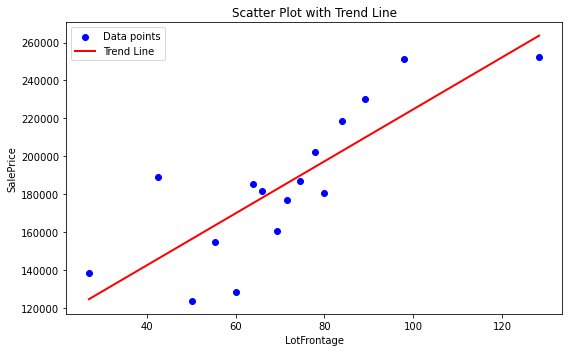

--------After Applying Transformation-----------

LotFrontage floored at 10 : 49.0
LotFrontage cap at 95 : 104.0
Transformation after cap and floor is sqaure
Transformed variable is LotFrontage__T


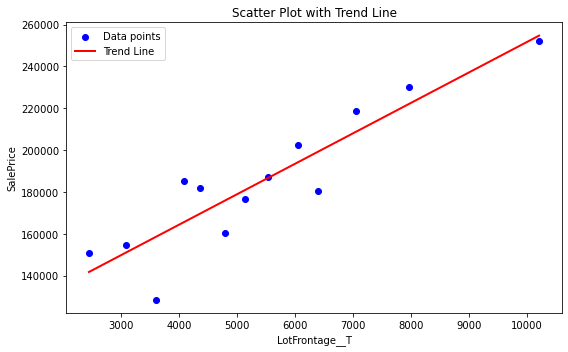

In [30]:
nth_trans = 0
dataout = linear_reg_v1.trasnformation_apply (data_4, impute_mv_cont,var,r2_data_all_trans,nth_trans,target)

In [31]:
data_4.shape, dataout.shape

((1460, 59), (1460, 62))

In [32]:
data_4[var+'__T'] = dataout[var+'__T'].copy()

## 2. LotArea

In [33]:
var = 'LotArea'

In [38]:
# var = 'LotArea'


r2_data_all_trans = linear_reg_v1.transformation_iterator(data_4,var,target,floor_list,cap_list,transformation_list,impute_mv_cont)

In [39]:
r2_data_all_trans

,LotArea,floor,cap,trans,R2
0,LotArea,10,90,sqaure,0.462228
1,LotArea,10,90,cube,0.462047
2,LotArea,1,90,cube,0.4619
3,LotArea,5,90,cube,0.461716
4,LotArea,1,90,sqaure,0.459213
5,LotArea,5,90,sqaure,0.459164
6,LotArea,10,90,None,0.451151
7,LotArea,10,95,None,0.442375
8,LotArea,10,90,sqrt,0.440297
9,LotArea,5,90,None,0.438638


-------Before Any Transformation------------
                     bin       LotArea      SalePrice
0     (1299.999, 3311.7]   2349.164384  138108.219178
1       (3311.7, 5000.0]   4244.202703  148125.378378
2       (5000.0, 6120.0]   5695.136986  132156.520548
3       (6120.0, 7078.4]   6661.000000  140812.027778
4       (7078.4, 7553.5]   7286.315068  146273.972603
5       (7553.5, 8063.7]   7813.273973  155324.602740
6       (8063.7, 8450.0]   8275.013333  151904.440000
7       (8450.0, 8793.4]   8630.169014  154672.830986
8       (8793.4, 9100.0]   8962.632911  158866.886076
9       (9100.0, 9478.5]   9278.104478  185428.686567
10      (9478.5, 9794.5]   9622.712329  170754.410959
11     (9794.5, 10198.2]   9999.890411  183758.219178
12   (10198.2, 10624.35]  10392.219178  183115.506849
13   (10624.35, 11066.5]  10814.575342  187245.205479
14    (11066.5, 11601.5]  11317.246575  205277.575342
15    (11601.5, 12205.8]  11915.890411  207439.041096
16    (12205.8, 13161.1]  12642.64383

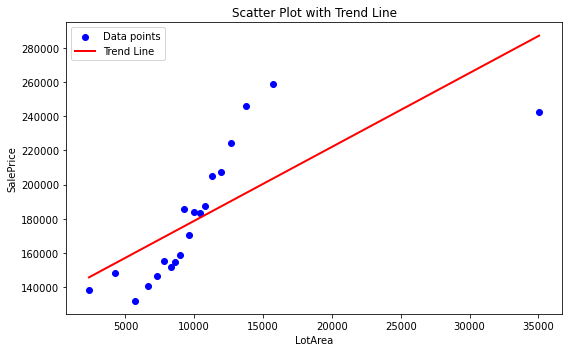

--------After Applying Transformation-----------

LotArea floored at 10 : 5000.0
LotArea cap at 90 : 14381.70000000001
Transformation after cap and floor is sqaure
Transformed variable is LotArea__T


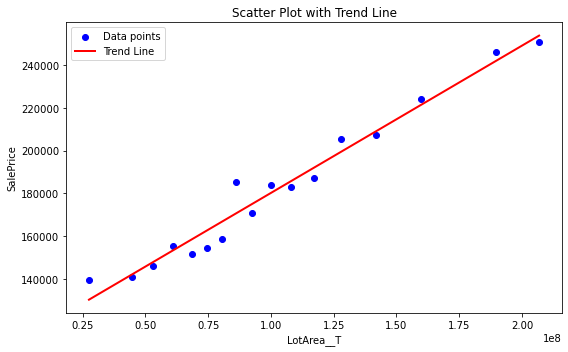

In [41]:
nth_trans = 0
dataout = linear_reg_v1.trasnformation_apply (data_4, impute_mv_cont,var,r2_data_all_trans,nth_trans,target)

In [42]:
data_4[var+'__T'] = dataout[var+'__T'].copy()

### 3. OverallQual

In [43]:
var = 'OverallQual'

In [44]:
r2_data_all_trans = linear_reg_v1.transformation_iterator(data_4,var,target,floor_list,cap_list,transformation_list,impute_mv_cont)

In [45]:
r2_data_all_trans

,OverallQual,floor,cap,trans,R2
0,OverallQual,1,99,cube,0.825032
1,OverallQual,5,99,cube,0.824117
2,OverallQual,10,99,cube,0.818536
3,OverallQual,1,99,sqaure,0.817077
4,OverallQual,5,99,sqaure,0.816995
5,OverallQual,10,99,sqaure,0.814794
6,OverallQual,10,99,None,0.801964
7,OverallQual,5,99,None,0.796455
8,OverallQual,1,99,None,0.793073
9,OverallQual,10,99,sqrt,0.792816


-------Before Any Transformation------------
            bin  OverallQual      SalePrice
0  (0.991, 1.9]          1.0   50150.000000
1    (1.9, 2.8]          2.0   51770.333333
2    (2.8, 3.7]          3.0   87473.750000
3    (3.7, 4.6]          4.0  108420.655172
4    (4.6, 5.5]          5.0  133523.347607
5    (5.5, 6.4]          6.0  161603.034759
6    (6.4, 7.3]          7.0  207716.423197
7    (7.3, 8.2]          8.0  274735.535714
8    (8.2, 9.1]          9.0  367513.023256
9   (9.1, 10.0]         10.0  438588.388889


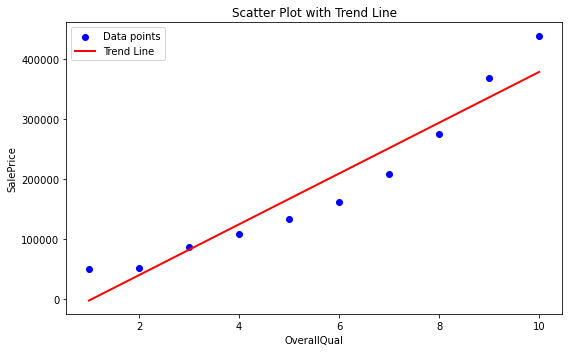

--------After Applying Transformation-----------

OverallQual floored at 1 : 3.0
OverallQual cap at 99 : 10.0
Transformation after cap and floor is None
Transformation after cap and floor is None
Transformed variable is OverallQual__T


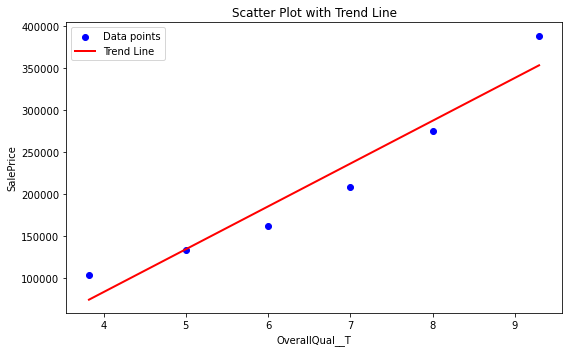

In [46]:
nth_trans = 8
dataout = linear_reg_v1.trasnformation_apply (data_4, impute_mv_cont,var,r2_data_all_trans,nth_trans,target)
data_4[var+'__T'] = dataout[var+'__T'].copy()

#### 4. YearBuilt

In [47]:
var = 'YearBuilt'

In [48]:
r2_data_all_trans = linear_reg_v1.transformation_iterator(data_4,var,target,floor_list,cap_list,transformation_list,impute_mv_cont)

In [49]:
r2_data_all_trans

,YearBuilt,floor,cap,trans,R2
0,YearBuilt,10,99,cube,0.550614
1,YearBuilt,10,99,sqaure,0.549317
2,YearBuilt,10,95,cube,0.549308
3,YearBuilt,10,95,sqaure,0.548028
4,YearBuilt,10,99,None,0.547997
5,YearBuilt,10,90,cube,0.54789
6,YearBuilt,10,99,sqrt,0.547329
7,YearBuilt,10,95,None,0.546725
8,YearBuilt,10,99,log,0.546655
9,YearBuilt,10,90,sqaure,0.546625


-------Before Any Transformation------------
                   bin    YearBuilt      SalePrice
0   (1871.999, 1916.0]  1905.337662  136117.155844
1     (1916.0, 1924.9]  1920.739130  127025.072464
2     (1924.9, 1936.0]  1929.565789  138009.000000
3     (1936.0, 1947.8]  1941.357143  129431.728571
4     (1947.8, 1954.0]  1951.161290  132331.494624
5     (1954.0, 1958.0]  1956.702703  141744.689189
6     (1958.0, 1961.0]  1959.789474  152832.140351
7     (1961.0, 1965.0]  1963.594595  150901.797297
8     (1965.0, 1969.0]  1967.457143  157903.985714
9     (1969.0, 1973.0]  1971.262500  136226.250000
10    (1973.0, 1977.0]  1976.048193  166875.361446
11    (1977.0, 1984.0]  1980.406780  167413.084746
12    (1984.0, 1993.0]  1990.040541  213888.918919
13    (1993.0, 1997.3]  1995.363636  247363.484848
14    (1997.3, 2000.0]  1998.986486  213986.729730
15    (2000.0, 2003.0]  2002.284091  230727.113636
16    (2003.0, 2005.0]  2004.542373  220833.542373
17    (2005.0, 2006.0]  2006.000000  

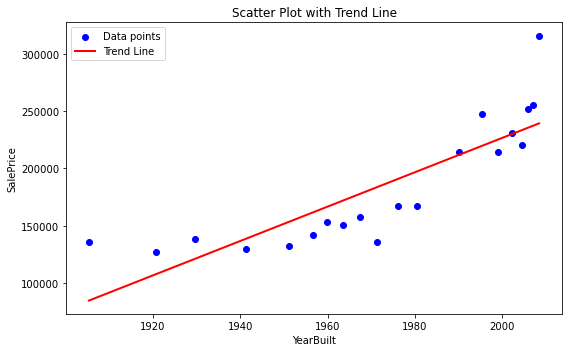

--------After Applying Transformation-----------

YearBuilt floored at 10 : 1924.9
YearBuilt cap at 99 : 2009.0
Transformation after cap and floor is None
Transformation after cap and floor is None
Transformed variable is YearBuilt__T


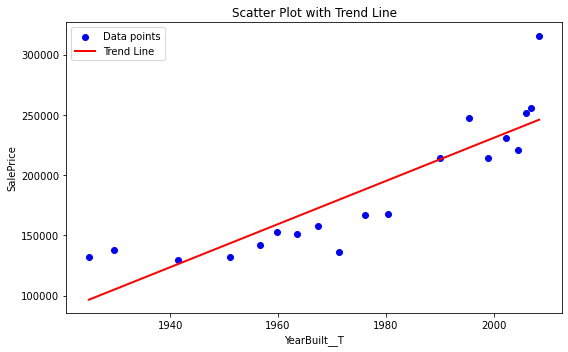

In [51]:
nth_trans = 4
dataout = linear_reg_v1.trasnformation_apply (data_4, impute_mv_cont,var,r2_data_all_trans,nth_trans,target)
data_4[var+'__T'] = dataout[var+'__T'].copy()

#### 5. YearRemodAdd

In [52]:
var = 'YearRemodAdd'

In [53]:
r2_data_all_trans = linear_reg_v1.transformation_iterator(data_4,var,target,floor_list,cap_list,transformation_list,impute_mv_cont)

In [54]:
r2_data_all_trans

,YearRemodAdd,floor,cap,trans,R2
0,YearRemodAdd,5,99,cube,0.507311
1,YearRemodAdd,1,99,cube,0.507311
2,YearRemodAdd,10,99,cube,0.507311
3,YearRemodAdd,10,99,sqaure,0.507073
4,YearRemodAdd,5,99,sqaure,0.507073
5,YearRemodAdd,1,99,sqaure,0.507073
6,YearRemodAdd,5,99,None,0.50683
7,YearRemodAdd,1,99,None,0.50683
8,YearRemodAdd,10,99,None,0.50683
9,YearRemodAdd,5,99,sqrt,0.506706


-------Before Any Transformation------------
                   bin  YearRemodAdd      SalePrice
0   (1949.999, 1955.0]   1950.659091  119424.168182
1     (1955.0, 1961.8]   1958.513889  133453.333333
2     (1961.8, 1967.0]   1964.523810  144836.345238
3     (1967.0, 1971.0]   1969.600000  141233.186667
4     (1971.0, 1976.0]   1974.243590  150443.320513
5     (1976.0, 1980.0]   1978.142857  156550.349206
6     (1980.0, 1989.0]   1985.366197  179618.309859
7     (1989.0, 1994.0]   1992.218391  201161.310345
8     (1994.0, 1996.0]   1995.537313  209925.000000
9     (1996.0, 1998.0]   1997.590164  209892.459016
10    (1998.0, 2000.0]   1999.647059  192486.741176
11    (2000.0, 2002.0]   2001.695652  207653.623188
12    (2002.0, 2004.0]   2003.548673  195021.061947
13    (2004.0, 2005.0]   2005.000000  210542.931507
14    (2005.0, 2006.0]   2006.000000  229471.134021
15    (2006.0, 2007.0]   2007.000000  224807.250000
16    (2007.0, 2010.0]   2008.507246  280349.405797


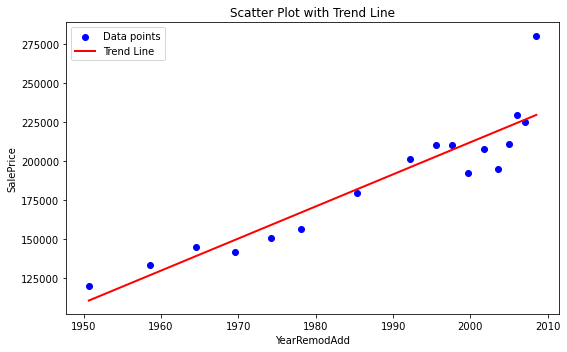

--------After Applying Transformation-----------

YearRemodAdd floored at 5 : 1950.0
YearRemodAdd cap at 99 : 2009.0
Transformation after cap and floor is cube
Transformed variable is YearRemodAdd__T


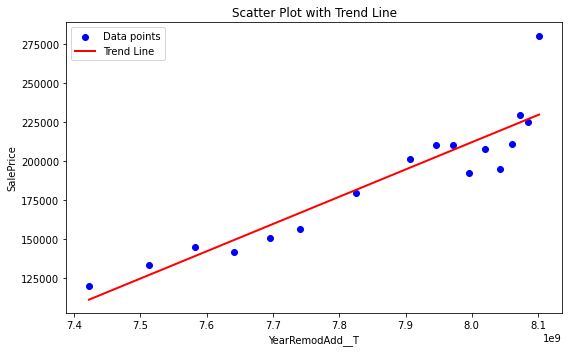

In [55]:
nth_trans = 0
dataout = linear_reg_v1.trasnformation_apply (data_4, impute_mv_cont,var,r2_data_all_trans,nth_trans,target)
data_4[var+'__T'] = dataout[var+'__T'].copy()

#### 6. MasVnrArea

In [56]:
var = 'MasVnrArea'

In [57]:
r2_data_all_trans = linear_reg_v1.transformation_iterator(data_4,var,target,floor_list,cap_list,transformation_list,impute_mv_cont)

MasVnrArea null value is imputed with : 264.71724137931034


In [58]:
r2_data_all_trans

,MasVnrArea,floor,cap,trans,R2
0,MasVnrArea,1,99,None,0.477952
1,MasVnrArea,5,99,None,0.477952
2,MasVnrArea,10,99,None,0.477952
3,MasVnrArea,1,95,None,0.458876
4,MasVnrArea,5,95,None,0.458876
5,MasVnrArea,10,95,None,0.458876
6,MasVnrArea,5,99,sqrt,0.457321
7,MasVnrArea,1,99,sqrt,0.457321
8,MasVnrArea,10,99,sqrt,0.457321
9,MasVnrArea,1,95,sqaure,0.447982


-------Before Any Transformation------------
                bin  MasVnrArea      SalePrice
0    (-0.001, 25.2]    0.252283  157044.482877
1      (25.2, 82.7]   59.178082  182370.109589
2     (82.7, 120.0]  103.171053  181934.407895
3    (120.0, 168.0]  146.661972  188063.253521
4    (168.0, 210.0]  187.786667  205849.960000
5  (210.0, 264.717]  240.788027  212833.152778
6  (264.717, 335.0]  295.625000  223671.097222
7    (335.0, 456.0]  387.826667  244703.480000
8   (456.0, 1600.0]  686.871429  298023.442857


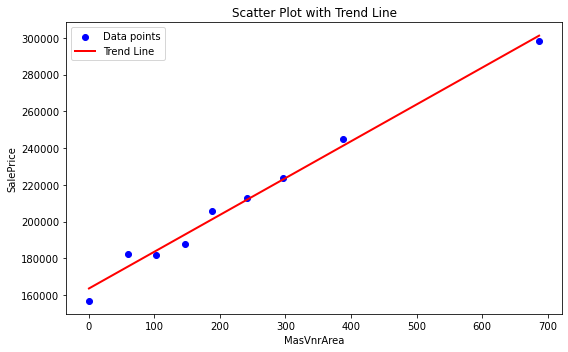

--------After Applying Transformation-----------

MasVnrArea floored at 1 : 0.0
MasVnrArea cap at 99 : 791.2800000000007
Transformation after cap and floor is None
Transformation after cap and floor is None
Transformed variable is MasVnrArea__T


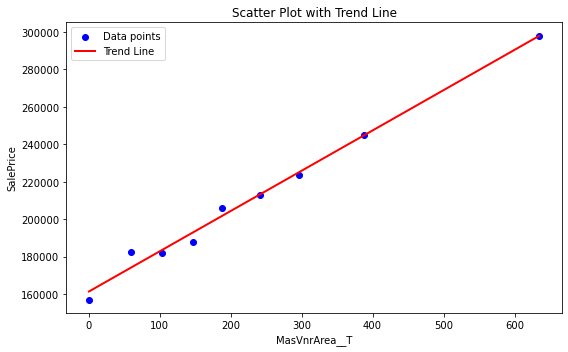

In [59]:
nth_trans = 0
dataout = linear_reg_v1.trasnformation_apply (data_4, impute_mv_cont,var,r2_data_all_trans,nth_trans,target)
data_4[var+'__T'] = dataout[var+'__T'].copy()

#### 7. BsmtFinSF1

In [60]:
var = 'BsmtFinSF1'

In [62]:
r2_data_all_trans = linear_reg_v1.transformation_iterator(data_4,var,target,floor_list,cap_list,transformation_list,impute_mv_cont)

In [63]:
r2_data_all_trans

,BsmtFinSF1,floor,cap,trans,R2
0,BsmtFinSF1,1,99,cube,0.515257
1,BsmtFinSF1,5,99,cube,0.515257
2,BsmtFinSF1,10,99,cube,0.515257
3,BsmtFinSF1,10,95,cube,0.494446
4,BsmtFinSF1,1,95,cube,0.494446
5,BsmtFinSF1,5,95,cube,0.494446
6,BsmtFinSF1,5,99,sqaure,0.489951
7,BsmtFinSF1,10,99,sqaure,0.489951
8,BsmtFinSF1,1,99,sqaure,0.489951
9,BsmtFinSF1,1,95,sqaure,0.462151


-------Before Any Transformation------------
                 bin   BsmtFinSF1      SalePrice
0    (-0.001, 56.65]     2.371820  168641.129159
1     (56.65, 218.6]   156.986301  148427.328767
2     (218.6, 312.0]   270.223684  159641.407895
3     (312.0, 383.5]   350.528571  149082.142857
4     (383.5, 450.0]   416.027027  160727.702703
5     (450.0, 525.6]   491.972222  161113.875000
6    (525.6, 593.35]   558.876712  159579.904110
7    (593.35, 655.0]   625.506667  163275.333333
8    (655.0, 712.25]   681.000000  174582.394366
9    (712.25, 806.4]   757.068493  181838.356164
10   (806.4, 929.45]   862.136986  183490.273973
11  (929.45, 1065.5]   996.150685  213973.095890
12  (1065.5, 1274.0]  1173.320000  252076.466667
13  (1274.0, 5644.0]  1532.084507  332204.140845


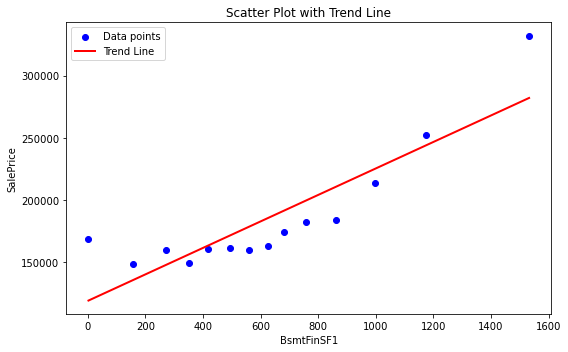

--------After Applying Transformation-----------

BsmtFinSF1 floored at 1 : 0.0
BsmtFinSF1 cap at 99 : 1572.41
Transformation after cap and floor is None
Transformation after cap and floor is None
Transformed variable is BsmtFinSF1__T


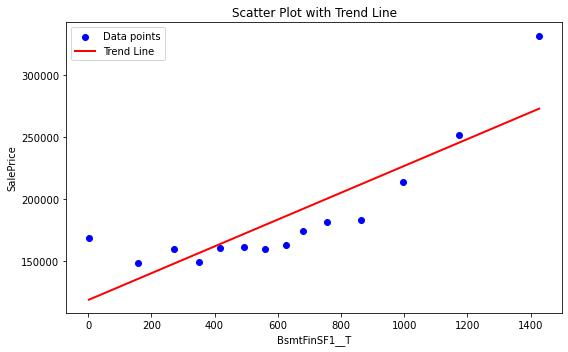

In [64]:
nth_trans = 19
dataout = linear_reg_v1.trasnformation_apply (data_4, impute_mv_cont,var,r2_data_all_trans,nth_trans,target)
data_4[var+'__T'] = dataout[var+'__T'].copy()

#### 8. TotalBsmtSF

In [65]:
var = 'TotalBsmtSF'

In [66]:
r2_data_all_trans = linear_reg_v1.transformation_iterator(data_4,var,target,floor_list,cap_list,transformation_list,impute_mv_cont)

In [67]:
r2_data_all_trans

,TotalBsmtSF,floor,cap,trans,R2
0,TotalBsmtSF,1,99,sqaure,0.669643
1,TotalBsmtSF,5,99,sqaure,0.668606
2,TotalBsmtSF,10,99,sqaure,0.666964
3,TotalBsmtSF,1,99,cube,0.665734
4,TotalBsmtSF,5,99,cube,0.664801
5,TotalBsmtSF,10,99,cube,0.663371
6,TotalBsmtSF,10,99,None,0.653801
7,TotalBsmtSF,5,99,None,0.653173
8,TotalBsmtSF,1,95,cube,0.647697
9,TotalBsmtSF,5,95,cube,0.646791


-------Before Any Transformation------------
                  bin  TotalBsmtSF      SalePrice
0     (-0.001, 519.3]   195.780822  110137.232877
1      (519.3, 636.9]   584.232877  124927.534247
2      (636.9, 701.7]   673.465753  130596.767123
3      (701.7, 755.8]   727.890411  151881.191781
4     (755.8, 795.75]   775.109589  153622.383562
5     (795.75, 840.0]   817.063291  157546.012658
6      (840.0, 864.0]   857.443038  145899.481013
7      (864.0, 910.0]   888.000000  159824.873016
8     (910.0, 946.65]   926.154930  153581.830986
9     (946.65, 991.5]   968.219178  155398.630137
10    (991.5, 1040.0]  1017.500000  160812.162162
11   (1040.0, 1088.0]  1064.643836  168989.342466
12   (1088.0, 1144.0]  1116.689189  184537.202703
13   (1144.0, 1216.0]  1182.500000  189548.763889
14  (1216.0, 1298.25]  1254.680556  196665.638889
15  (1298.25, 1391.2]  1347.397260  204774.383562
16  (1391.2, 1485.15]  1441.452055  227043.794521
17  (1485.15, 1602.2]  1542.452055  238782.260274
18   

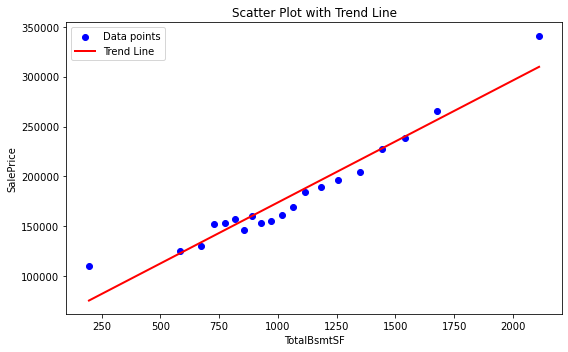

--------After Applying Transformation-----------

TotalBsmtSF floored at 5 : 519.3000000000001
TotalBsmtSF cap at 99 : 2155.05
Transformation after cap and floor is None
Transformation after cap and floor is None
Transformed variable is TotalBsmtSF__T


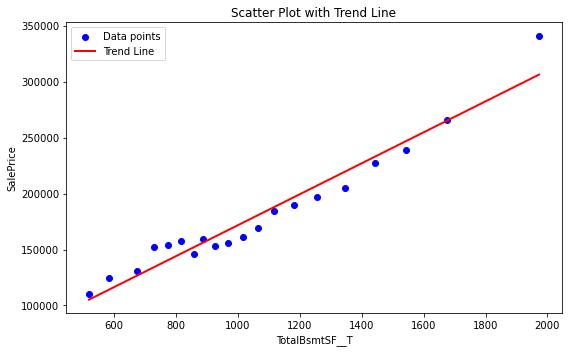

In [68]:
nth_trans = 7
dataout = linear_reg_v1.trasnformation_apply (data_4, impute_mv_cont,var,r2_data_all_trans,nth_trans,target)
data_4[var+'__T'] = dataout[var+'__T'].copy()

#### 9. 1stFlrSF

In [69]:
var = '1stFlrSF'

In [71]:
r2_data_all_trans = linear_reg_v1.transformation_iterator(data_4,var,target,floor_list,cap_list,transformation_list,impute_mv_cont)

In [72]:
r2_data_all_trans

,1stFlrSF,floor,cap,trans,R2
0,1stFlrSF,1,99,sqaure,0.633279
1,1stFlrSF,5,99,sqaure,0.632125
2,1stFlrSF,10,99,sqaure,0.63082
3,1stFlrSF,1,99,cube,0.628136
4,1stFlrSF,5,99,cube,0.627279
5,1stFlrSF,10,99,cube,0.626022
6,1stFlrSF,1,99,None,0.621984
7,1stFlrSF,5,99,None,0.621707
8,1stFlrSF,10,99,None,0.621639
9,1stFlrSF,1,95,cube,0.62036


-------Before Any Transformation------------
                  bin     1stFlrSF      SalePrice
0   (333.999, 672.95]   586.561644  111361.547945
1     (672.95, 756.9]   717.260274  137372.863014
2      (756.9, 804.0]   782.855263  143085.526316
3      (804.0, 848.0]   829.368421  148222.618421
4      (848.0, 882.0]   865.742857  139980.628571
5      (882.0, 915.7]   900.228571  145943.142857
6     (915.7, 959.65]   939.698630  151337.506849
7    (959.65, 1000.2]   979.000000  149647.945205
8    (1000.2, 1048.0]  1025.226667  147331.906667
9    (1048.0, 1087.0]  1065.985915  166732.887324
10  (1087.0, 1132.45]  1109.575342  169591.041096
11  (1132.45, 1182.0]  1154.743243  185495.783784
12   (1182.0, 1242.7]  1213.902778  181123.111111
13   (1242.7, 1314.0]  1280.386667  188824.240000
14  (1314.0, 1391.25]  1352.492958  187916.732394
15  (1391.25, 1482.4]  1439.589041  212459.890411
16  (1482.4, 1572.15]  1523.917808  228936.561644
17  (1572.15, 1680.0]  1628.067568  228114.689189
18  (

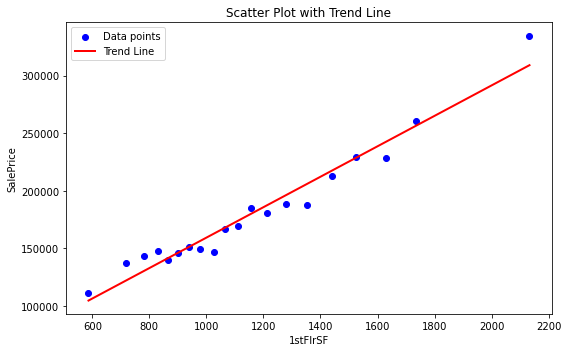

--------After Applying Transformation-----------

1stFlrSF floored at 1 : 520.0
1stFlrSF cap at 99 : 2219.4600000000005
Transformation after cap and floor is None
Transformation after cap and floor is None
Transformed variable is 1stFlrSF__T


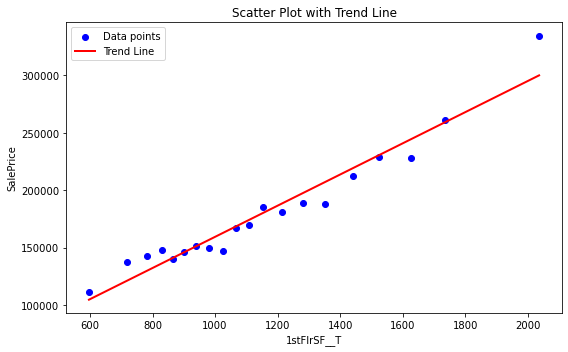

In [73]:
nth_trans = 6
dataout = linear_reg_v1.trasnformation_apply (data_4, impute_mv_cont,var,r2_data_all_trans,nth_trans,target)
data_4[var+'__T'] = dataout[var+'__T'].copy()

#### 10. 2ndFlrSF

In [75]:
var = '2ndFlrSF'

In [76]:
r2_data_all_trans = linear_reg_v1.transformation_iterator(data_4,var,target,floor_list,cap_list,transformation_list,impute_mv_cont)

In [77]:
r2_data_all_trans

,2ndFlrSF,floor,cap,trans,R2
0,2ndFlrSF,1,99,cube,0.440881
1,2ndFlrSF,5,99,cube,0.440881
2,2ndFlrSF,10,99,cube,0.440881
3,2ndFlrSF,10,95,cube,0.408283
4,2ndFlrSF,1,95,cube,0.408283
5,2ndFlrSF,5,95,cube,0.408283
6,2ndFlrSF,5,99,sqaure,0.400239
7,2ndFlrSF,10,99,sqaure,0.400239
8,2ndFlrSF,1,99,sqaure,0.400239
9,2ndFlrSF,1,95,sqaure,0.365416


-------Before Any Transformation------------
                 bin     2ndFlrSF      SalePrice
0    (-0.001, 455.4]    18.504566  168671.163242
1    (455.4, 573.35]   525.246575  134048.698630
2    (573.35, 672.0]   626.936709  155563.607595
3     (672.0, 728.0]   703.231884  169989.550725
4     (728.0, 796.2]   761.859155  178751.859155
5    (796.2, 870.15]   834.506849  198720.890411
6    (870.15, 954.2]   899.863014  213878.287671
7   (954.2, 1141.05]  1047.753425  235701.315068
8  (1141.05, 2065.0]  1326.273973  309141.506849


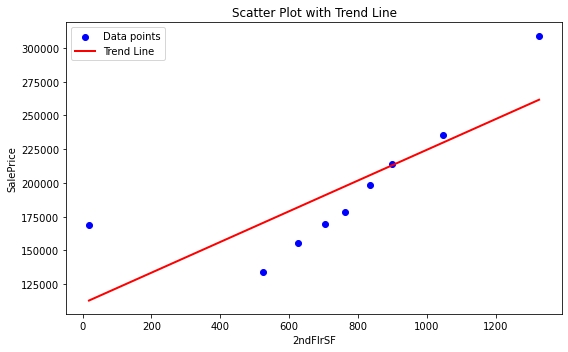

--------After Applying Transformation-----------

2ndFlrSF floored at 1 : 0.0
2ndFlrSF cap at 90 : 954.2000000000003
Transformation after cap and floor is cube
Transformed variable is 2ndFlrSF__T


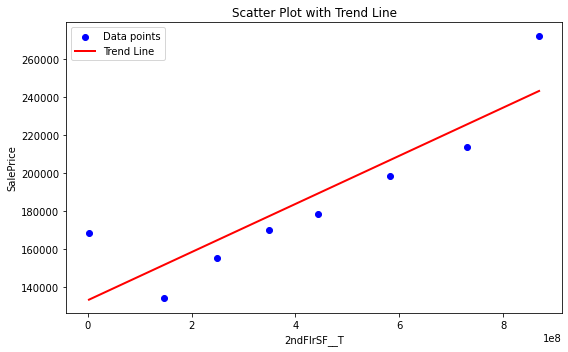

In [78]:
nth_trans = 12
dataout = linear_reg_v1.trasnformation_apply (data_4, impute_mv_cont,var,r2_data_all_trans,nth_trans,target)
data_4[var+'__T'] = dataout[var+'__T'].copy()

#### 11. GrLivArea

In [79]:
var = 'GrLivArea'

In [80]:
r2_data_all_trans = linear_reg_v1.transformation_iterator(data_4,var,target,floor_list,cap_list,transformation_list,impute_mv_cont)

In [81]:
r2_data_all_trans

,GrLivArea,floor,cap,trans,R2
0,GrLivArea,1,99,None,0.713622
1,GrLivArea,5,99,None,0.712699
2,GrLivArea,10,99,None,0.712525
3,GrLivArea,10,99,sqrt,0.707976
4,GrLivArea,5,99,sqrt,0.706908
5,GrLivArea,1,99,sqrt,0.706724
6,GrLivArea,1,99,sqaure,0.706341
7,GrLivArea,5,99,sqaure,0.704994
8,GrLivArea,10,99,sqaure,0.703862
9,GrLivArea,1,95,sqaure,0.699165


-------Before Any Transformation------------
                  bin    GrLivArea      SalePrice
0    (333.999, 848.0]   755.897436  102327.705128
1      (848.0, 912.0]   882.946667  116434.546667
2      (912.0, 988.0]   957.014706  117593.529412
3     (988.0, 1066.6]  1032.535211  128004.830986
4    (1066.6, 1129.5]  1099.410959  130393.904110
5    (1129.5, 1208.0]  1169.460526  139306.894737
6    (1208.0, 1262.0]  1234.098592  149973.507042
7    (1262.0, 1339.0]  1304.000000  156431.753425
8   (1339.0, 1392.55]  1365.222222  152200.458333
9   (1392.55, 1464.0]  1431.500000  169897.297297
10  (1464.0, 1509.45]  1488.083333  182798.402778
11  (1509.45, 1578.0]  1548.243243  186308.202703
12  (1578.0, 1651.35]  1618.569444  196033.055556
13  (1651.35, 1709.3]  1677.780822  204464.068493
14  (1709.3, 1776.75]  1737.698630  201623.150685
15  (1776.75, 1869.0]  1822.148649  215796.054054
16   (1869.0, 1987.3]  1937.500000  228634.708333
17   (1987.3, 2158.3]  2073.602740  250402.780822
18   

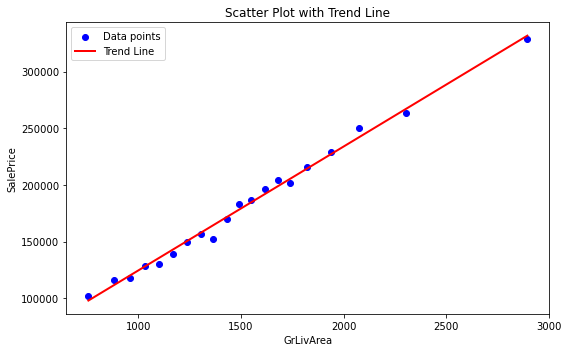

--------After Applying Transformation-----------

GrLivArea floored at 1 : 692.18
GrLivArea cap at 99 : 3123.4800000000023
Transformation after cap and floor is None
Transformation after cap and floor is None
Transformed variable is GrLivArea__T


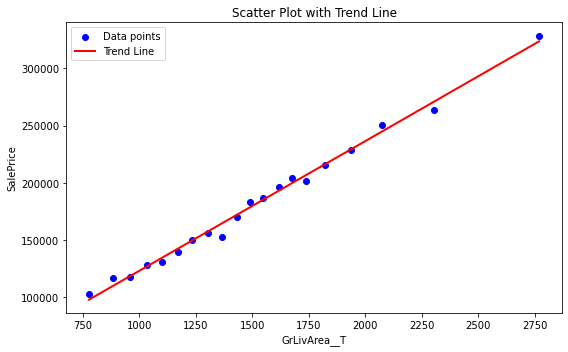

In [82]:
nth_trans = 0
dataout = linear_reg_v1.trasnformation_apply (data_4, impute_mv_cont,var,r2_data_all_trans,nth_trans,target)
data_4[var+'__T'] = dataout[var+'__T'].copy()

### 12. FullBath

FullBath---- categorical Variable 

In [96]:
var = 'FullBath'

In [85]:
r2_data_all_trans = linear_reg_v1.transformation_iterator(data_4,var,target,floor_list,cap_list,transformation_list,impute_mv_cont)

In [86]:
r2_data_all_trans

,FullBath,floor,cap,trans,R2
0,FullBath,10,99,sqaure,0.579202
1,FullBath,1,99,sqaure,0.579202
2,FullBath,5,99,sqaure,0.579202
3,FullBath,1,99,None,0.570981
4,FullBath,10,99,None,0.570981
5,FullBath,5,99,None,0.570981
6,FullBath,10,99,cube,0.56996
7,FullBath,5,99,cube,0.56996
8,FullBath,1,99,cube,0.56996
9,FullBath,10,99,sqrt,0.564072


-------Before Any Transformation------------
              bin  FullBath      SalePrice
0  (-0.003, 0.75]       0.0  165200.888889
1     (0.75, 1.5]       1.0  134751.440000
2     (1.5, 2.25]       2.0  213009.825521
3     (2.25, 3.0]       3.0  347822.909091


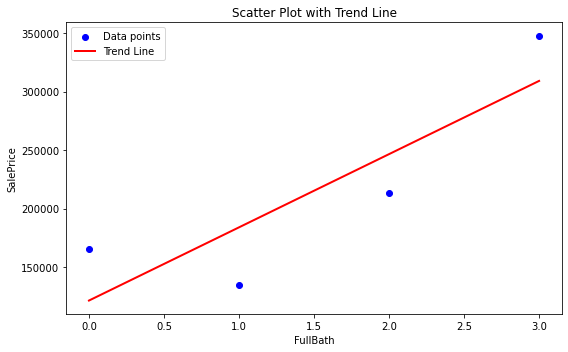

--------After Applying Transformation-----------

FullBath floored at 1 : 1.0
FullBath cap at 99 : 3.0
Transformation after cap and floor is None
Transformation after cap and floor is None
Transformed variable is FullBath__T


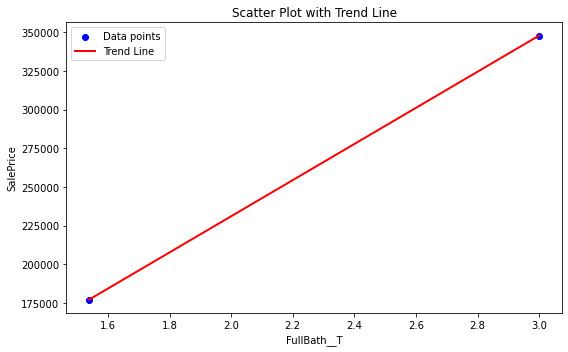

In [87]:
nth_trans = 3
dataout = linear_reg_v1.trasnformation_apply (data_4, impute_mv_cont,var,r2_data_all_trans,nth_trans,target)
data_4[var+'__T'] = dataout[var+'__T'].copy()

### Since it is categorical variable, apply one hot encoding , also the category is only 4 thats why one hot encoding

In [88]:
# Applying one-hot encoding
df_encoded = pd.get_dummies(data_4['FullBath'],prefix = var, dtype=int)
data_4 = data_4.join(df_encoded)


In [89]:
data_4.drop(columns = [var+'__T'],inplace= True)

In [98]:
# drop one colum after one hot encoding to avaoid the multicollinarity
data_4.drop(columns=[var+'_1'],inplace= True)

#### 13.HalfBath 

In [100]:
var = 'HalfBath'

In [91]:
r2_data_all_trans = linear_reg_v1.transformation_iterator(data_4,var,target,floor_list,cap_list,transformation_list,impute_mv_cont)

In [92]:
r2_data_all_trans

,HalfBath,floor,cap,trans,R2
0,HalfBath,10,90,log,0.299111
1,HalfBath,5,90,log,0.299111
2,HalfBath,1,90,log,0.299111
3,HalfBath,10,95,log,0.299111
4,HalfBath,5,95,log,0.299111
5,HalfBath,1,95,log,0.299111
6,HalfBath,10,99,log,0.299111
7,HalfBath,5,99,log,0.299111
8,HalfBath,1,99,log,0.299111
9,HalfBath,1,95,sqrt,0.299111


-------Before Any Transformation------------
               bin  HalfBath      SalePrice
0  (-0.002, 0.667]       0.0  162534.884995
1   (0.667, 1.333]       1.0  212721.960748
2     (1.333, 2.0]       2.0  162028.916667


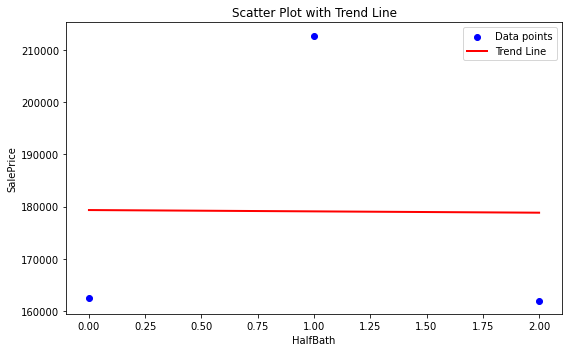

--------After Applying Transformation-----------

HalfBath floored at 10 : 0.0
HalfBath cap at 90 : 1.0
Transformation after cap and floor is log
Transformed variable is HalfBath__T


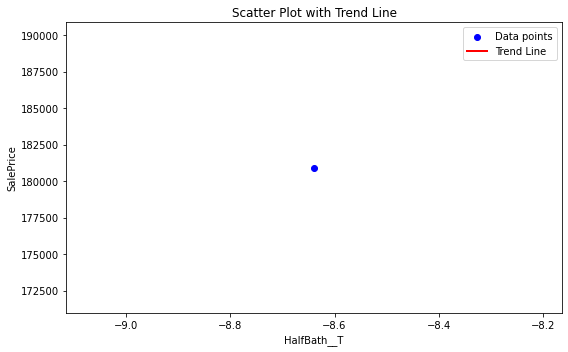

In [93]:
nth_trans = 0
dataout = linear_reg_v1.trasnformation_apply (data_4, impute_mv_cont,var,r2_data_all_trans,nth_trans,target)
data_4[var+'__T'] = dataout[var+'__T'].copy()

In [94]:
#### Agin halfbath is categorical and categories are less than 5, we are uing one hot encoding for this \
# Applying one-hot encoding
df_encoded = pd.get_dummies(data_4['HalfBath'],prefix = var, dtype=int)
data_4 = data_4.join(df_encoded)



In [102]:
data_4.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,...,BsmtFinSF1__T,TotalBsmtSF__T,1stFlrSF__T,2ndFlrSF__T,GrLivArea__T,FullBath_0,FullBath_2,FullBath_3,HalfBath_0,HalfBath_2
0,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,...,706.0,856.0,856.0,6.228359e+08,1710.0,0,1,0,0,0
1,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Feedr,...,978.0,1262.0,1262.0,0.000000e+00,1262.0,0,1,0,1,0
2,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,...,486.0,920.0,920.0,6.494619e+08,1786.0,0,1,0,0,0
3,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,...,216.0,756.0,961.0,4.320812e+08,1717.0,0,0,0,1,0
4,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,Norm,...,655.0,1145.0,1145.0,8.687968e+08,2198.0,0,1,0,0,0


In [101]:
data_4.drop(columns = [var+'__T',var+'_1'],inplace= True)

#### 14.TotRmsAbvGrd 

In [105]:
var = 'TotRmsAbvGrd'

In [106]:
data_4['TotRmsAbvGrd'].unique()

array([ 8,  6,  7,  9,  5, 11,  4, 10, 12,  3,  2, 14], dtype=int64)

In [108]:
r2_data_all_trans = linear_reg_v1.transformation_iterator(data_4,var,target,floor_list,cap_list,transformation_list,impute_mv_cont)

In [109]:
r2_data_all_trans

,TotRmsAbvGrd,floor,cap,trans,R2
0,TotRmsAbvGrd,1,95,sqaure,0.541599
1,TotRmsAbvGrd,5,95,sqaure,0.541172
2,TotRmsAbvGrd,1,99,sqaure,0.539038
3,TotRmsAbvGrd,5,99,sqaure,0.538476
4,TotRmsAbvGrd,5,99,None,0.538419
5,TotRmsAbvGrd,1,99,None,0.537651
6,TotRmsAbvGrd,1,95,cube,0.537039
7,TotRmsAbvGrd,10,95,sqaure,0.536975
8,TotRmsAbvGrd,5,95,None,0.536888
9,TotRmsAbvGrd,10,99,None,0.536814


-------Before Any Transformation------------
             bin  TotRmsAbvGrd      SalePrice
0   (1.988, 3.0]      2.944444  107222.222222
1     (3.0, 4.0]      4.000000  122844.628866
2     (4.0, 5.0]      5.000000  141550.749091
3     (5.0, 6.0]      6.000000  161303.296020
4     (6.0, 7.0]      7.000000  196666.784195
5     (7.0, 8.0]      8.000000  213427.529412
6     (8.0, 9.0]      9.000000  252988.173333
7    (9.0, 10.0]     10.000000  296279.170213
8   (10.0, 11.0]     11.000000  318022.000000
9   (11.0, 12.0]     12.000000  280971.454545
11  (13.0, 14.0]     14.000000  200000.000000


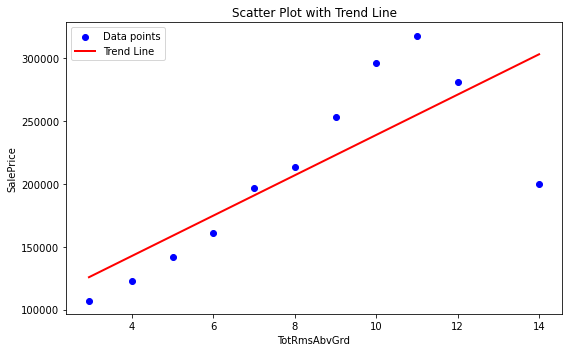

--------After Applying Transformation-----------

TotRmsAbvGrd floored at 1 : 3.0
TotRmsAbvGrd cap at 95 : 10.0
Transformation after cap and floor is sqaure
Transformed variable is TotRmsAbvGrd__T


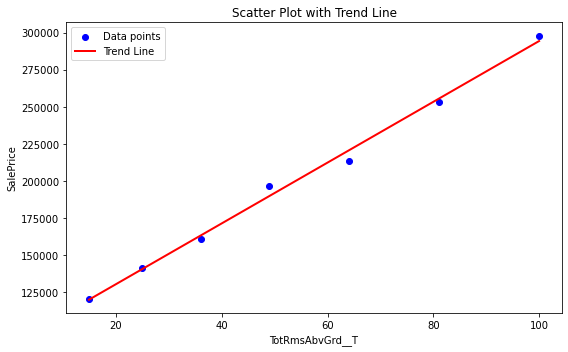

In [110]:
nth_trans = 0
dataout = linear_reg_v1.trasnformation_apply (data_4, impute_mv_cont,var,r2_data_all_trans,nth_trans,target)
data_4[var+'__T'] = dataout[var+'__T'].copy()

#### 15.Fireplaces 

In [112]:
var = 'Fireplaces'

In [113]:
data_4['Fireplaces'].unique()

array([0, 1, 2, 3], dtype=int64)

In [114]:
df_dummy = pd.get_dummies(data_4[var],prefix = var)
data_4 = data_4.join(df_dummy)

In [116]:
data_4.drop(columns = [var+'_0'],inplace = True)

#### 16. GarageYrBlt

In [117]:
num_var[15]

'GarageYrBlt'

In [118]:
var = 'GarageYrBlt'

In [119]:
r2_data_all_trans = linear_reg_v1.transformation_iterator(data_4,var,target,floor_list,cap_list,transformation_list,impute_mv_cont)
r2_data_all_trans

GarageYrBlt null value is imputed with : 1952.7028985507247


,GarageYrBlt,floor,cap,trans,R2
0,GarageYrBlt,10,99,cube,0.548463
1,GarageYrBlt,10,99,sqaure,0.547966
2,GarageYrBlt,10,99,None,0.547461
3,GarageYrBlt,10,99,sqrt,0.547206
4,GarageYrBlt,10,99,log,0.546949
5,GarageYrBlt,10,95,cube,0.546272
6,GarageYrBlt,10,95,sqaure,0.545799
7,GarageYrBlt,10,95,None,0.545318
8,GarageYrBlt,10,95,sqrt,0.545074
9,GarageYrBlt,10,95,log,0.544829


-------Before Any Transformation------------
                   bin  GarageYrBlt      SalePrice
0   (1899.999, 1930.0]  1921.776316  135576.197368
1     (1930.0, 1948.0]  1940.250000  144199.375000
2   (1948.0, 1952.703]  1951.827334  113690.139344
3   (1952.703, 1954.0]  1953.612903  141841.935484
4     (1954.0, 1958.0]  1956.700000  136922.657143
5     (1958.0, 1962.0]  1960.542857  150812.857143
6     (1962.0, 1966.0]  1964.618421  150390.618421
7     (1966.0, 1970.0]  1968.526316  152514.776316
8     (1970.0, 1974.0]  1972.627119  150177.118644
9     (1974.0, 1977.0]  1976.356164  163875.054795
10   (1977.0, 1983.45]  1979.800000  161051.028571
11   (1983.45, 1990.0]  1987.426667  179584.400000
12    (1990.0, 1995.0]  1993.287500  228555.037500
13    (1995.0, 1998.0]  1997.157143  213787.714286
14    (1998.0, 2001.0]  1999.870130  212068.415584
15    (2001.0, 2003.0]  2002.657895  220846.855263
16    (2003.0, 2005.0]  2004.550847  215066.983051
17    (2005.0, 2006.0]  2006.000000  

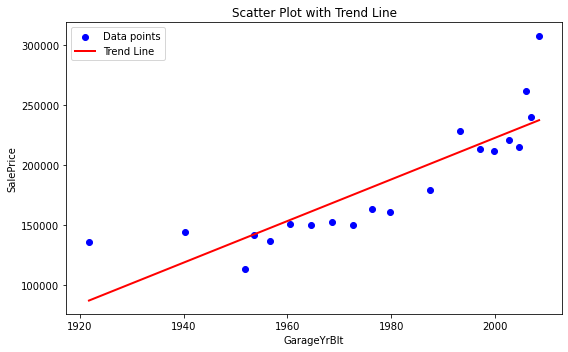

--------After Applying Transformation-----------

GarageYrBlt floored at 10 : 1948.0
GarageYrBlt cap at 99 : 2009.0
Transformation after cap and floor is None
Transformation after cap and floor is None
Transformed variable is GarageYrBlt__T


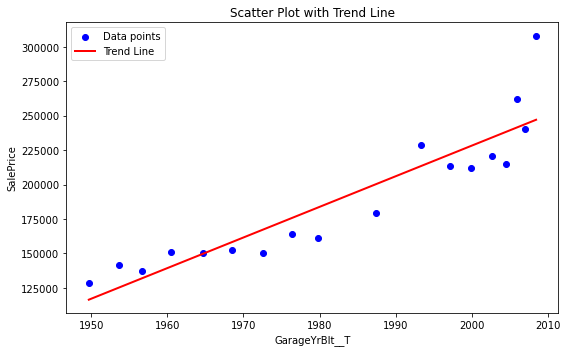

In [120]:
nth_trans = 2
dataout = linear_reg_v1.trasnformation_apply (data_4, impute_mv_cont,var,r2_data_all_trans,nth_trans,target)
data_4[var+'__T'] = dataout[var+'__T'].copy()

#### 17.GarageCars 

In [121]:
num_var[16]

'GarageCars'

In [122]:
var = 'GarageCars'

In [123]:
data_4[var].unique()

array([2, 3, 1, 0, 4], dtype=int64)

In [124]:
r2_data_all_trans = linear_reg_v1.transformation_iterator(data_4,var,target,floor_list,cap_list,transformation_list,impute_mv_cont)
r2_data_all_trans

,GarageCars,floor,cap,trans,R2
0,GarageCars,1,95,sqaure,0.692417
1,GarageCars,5,90,sqaure,0.692417
2,GarageCars,1,90,sqaure,0.692417
3,GarageCars,5,95,sqaure,0.692417
4,GarageCars,1,99,sqaure,0.692417
5,GarageCars,5,99,sqaure,0.692417
6,GarageCars,1,90,cube,0.691207
7,GarageCars,5,90,cube,0.691207
8,GarageCars,1,95,cube,0.691207
9,GarageCars,5,99,cube,0.691207


-------Before Any Transformation------------
             bin  GarageCars      SalePrice
0  (-0.004, 0.8]         0.0  103317.283951
1     (0.8, 1.6]         1.0  128116.688347
2     (1.6, 2.4]         2.0  183851.663835
3     (2.4, 3.2]         3.0  309636.121547
4     (3.2, 4.0]         4.0  192655.800000


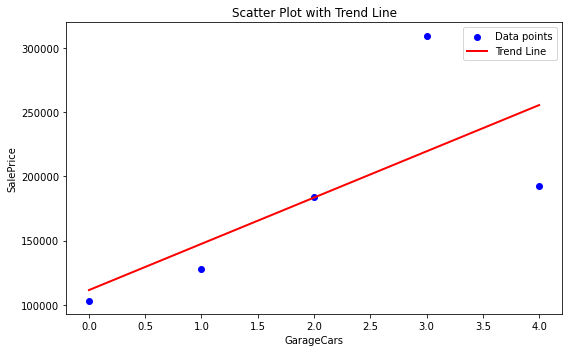

--------After Applying Transformation-----------

GarageCars floored at 1 : 0.0
GarageCars cap at 95 : 3.0
Transformation after cap and floor is sqaure
Transformed variable is GarageCars__T


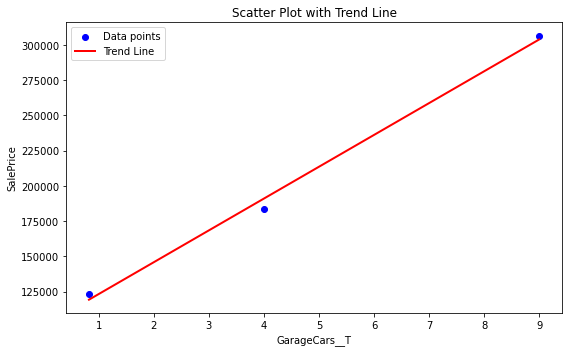

In [125]:
nth_trans = 0
dataout = linear_reg_v1.trasnformation_apply (data_4, impute_mv_cont,var,r2_data_all_trans,nth_trans,target)
data_4[var+'__T'] = dataout[var+'__T'].copy()

In [127]:
df_dummy = pd.get_dummies(data_4[var],prefix = var)
data_4 = data_4.join(df_dummy)


In [128]:
data_4.drop(columns = [var+'__T',var+'_0'],inplace = True)

#### 18.GarageArea 

In [130]:
num_var[17]

'GarageArea'

In [131]:
var = 'GarageArea'

In [132]:
r2_data_all_trans = linear_reg_v1.transformation_iterator(data_4,var,target,floor_list,cap_list,transformation_list,impute_mv_cont)
r2_data_all_trans

,GarageArea,floor,cap,trans,R2
0,GarageArea,5,95,sqaure,0.655013
1,GarageArea,1,95,sqaure,0.655013
2,GarageArea,10,95,sqaure,0.65242
3,GarageArea,5,90,sqaure,0.651333
4,GarageArea,1,90,sqaure,0.651333
5,GarageArea,1,90,cube,0.651101
6,GarageArea,5,90,cube,0.651101
7,GarageArea,10,90,sqaure,0.650019
8,GarageArea,10,90,cube,0.649396
9,GarageArea,10,95,None,0.647648


-------Before Any Transformation------------
                bin  GarageArea      SalePrice
0   (-0.001, 240.0]  113.589286  117874.648810
1    (240.0, 272.7]  260.470588  124559.803922
2    (272.7, 295.6]  284.547945  120342.246575
3    (295.6, 334.5]  307.849315  134430.013699
4    (334.5, 384.0]  358.586667  137701.760000
5   (384.0, 412.65]  398.323944  161812.112676
6   (412.65, 440.0]  432.427350  168868.376068
7    (440.0, 456.0]  449.166667  168986.333333
8    (456.0, 480.0]  470.610526  174912.578947
9    (480.0, 490.0]  484.823529  187988.450980
10   (490.0, 516.0]  503.315068  183761.273973
11  (516.0, 531.35]  526.527778  172328.583333
12  (531.35, 560.0]  544.756757  199450.648649
13   (560.0, 576.0]  572.658824  178871.764706
14   (576.0, 620.2]  598.300000  216944.500000
15   (620.2, 672.0]  649.096386  211853.566265
16   (672.0, 757.1]  711.682540  264007.238095
17   (757.1, 850.1]  807.643836  315402.616438
18  (850.1, 1418.0]  945.945205  280828.082192


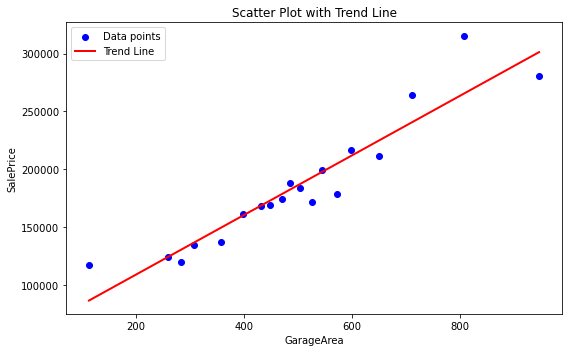

--------After Applying Transformation-----------

GarageArea floored at 10 : 240.0
GarageArea cap at 95 : 850.0999999999999
Transformation after cap and floor is None
Transformation after cap and floor is None
Transformed variable is GarageArea__T


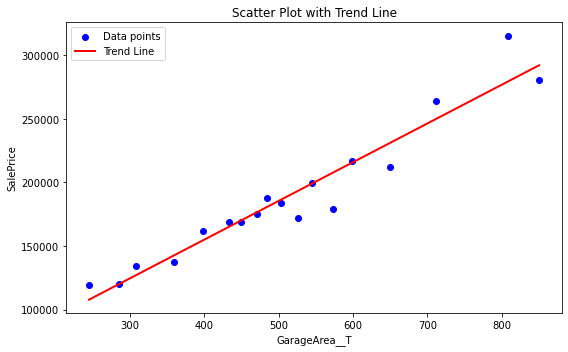

In [133]:
nth_trans = 9
dataout = linear_reg_v1.trasnformation_apply (data_4, impute_mv_cont,var,r2_data_all_trans,nth_trans,target)
data_4[var+'__T'] = dataout[var+'__T'].copy()

#### 19.WoodDeckSF 

In [134]:
num_var[18]

'WoodDeckSF'

In [135]:
var = 'WoodDeckSF'

In [136]:
r2_data_all_trans = linear_reg_v1.transformation_iterator(data_4,var,target,floor_list,cap_list,transformation_list,impute_mv_cont)
r2_data_all_trans

,WoodDeckSF,floor,cap,trans,R2
0,WoodDeckSF,1,90,None,0.340151
1,WoodDeckSF,5,90,None,0.340151
2,WoodDeckSF,10,90,None,0.340151
3,WoodDeckSF,5,99,sqrt,0.336738
4,WoodDeckSF,1,99,sqrt,0.336738
5,WoodDeckSF,10,99,sqrt,0.336738
6,WoodDeckSF,1,95,sqrt,0.33565
7,WoodDeckSF,5,95,sqrt,0.33565
8,WoodDeckSF,10,95,sqrt,0.33565
9,WoodDeckSF,1,95,None,0.334923


-------Before Any Transformation------------
               bin  WoodDeckSF      SalePrice
0  (-0.001, 63.45]    2.174346  157983.047323
1   (63.45, 100.0]   90.302632  174859.210526
2  (100.0, 125.35]  116.100000  192051.342857
3  (125.35, 144.0]  140.194805  203633.441558
4   (144.0, 168.0]  160.294872  198473.064103
5   (168.0, 192.0]  185.024390  227344.768293
6   (192.0, 216.0]  206.160714  235366.678571
7   (216.0, 262.0]  237.315068  210531.410959
8   (262.0, 335.0]  296.202703  215763.243243
9   (335.0, 857.0]  445.112676  228632.577465


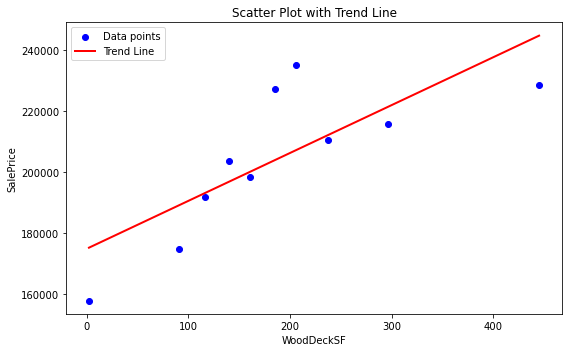

--------After Applying Transformation-----------

WoodDeckSF floored at 1 : 0.0
WoodDeckSF cap at 99 : 505.4600000000005
Transformation after cap and floor is sqrt
Transformed variable is WoodDeckSF__T


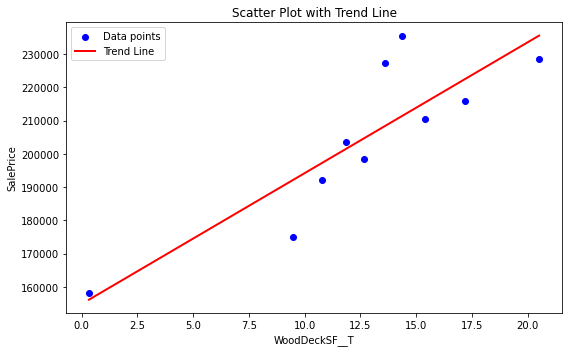

In [137]:
nth_trans = 4
dataout = linear_reg_v1.trasnformation_apply (data_4, impute_mv_cont,var,r2_data_all_trans,nth_trans,target)
data_4[var+'__T'] = dataout[var+'__T'].copy()

#### 20.OpenPorchSF 

In [138]:
num_var[19]

'OpenPorchSF'

In [139]:
var = 'OpenPorchSF'

In [140]:
r2_data_all_trans = linear_reg_v1.transformation_iterator(data_4,var,target,floor_list,cap_list,transformation_list,impute_mv_cont)
r2_data_all_trans

,OpenPorchSF,floor,cap,trans,R2
0,OpenPorchSF,1,90,sqrt,0.42776
1,OpenPorchSF,5,90,sqrt,0.42776
2,OpenPorchSF,10,90,sqrt,0.42776
3,OpenPorchSF,1,95,sqrt,0.420871
4,OpenPorchSF,5,95,sqrt,0.420871
5,OpenPorchSF,10,95,sqrt,0.420871
6,OpenPorchSF,1,95,log,0.420463
7,OpenPorchSF,10,95,log,0.420463
8,OpenPorchSF,5,95,log,0.420463
9,OpenPorchSF,10,99,log,0.42044


-------Before Any Transformation------------
                bin  OpenPorchSF      SalePrice
0     (-0.001, 6.2]     0.006088  144573.978691
1       (6.2, 25.0]    20.177215  172270.189873
2      (25.0, 34.0]    29.728571  185566.985714
3      (34.0, 40.0]    37.518519  196162.679012
4      (40.0, 48.0]    45.298701  210979.298701
5      (48.0, 57.0]    52.901639  222766.967213
6      (57.0, 68.0]    63.054795  225047.041096
7      (68.0, 83.2]    75.214286  243508.785714
8     (83.2, 105.0]    95.373333  212719.706667
9    (105.0, 130.0]   118.109589  210003.698630
10  (130.0, 175.05]   151.098592  228867.507042
11  (175.05, 547.0]   250.958904  216843.150685


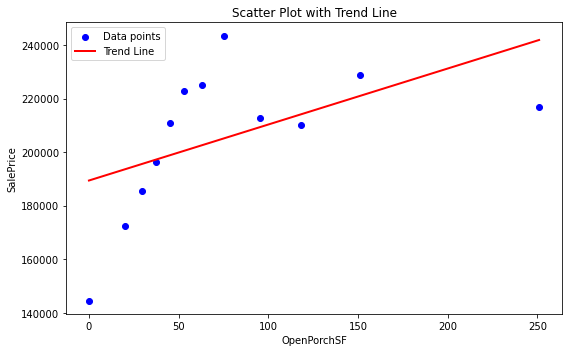

--------After Applying Transformation-----------

OpenPorchSF floored at 1 : 0.0
OpenPorchSF cap at 90 : 130.0
Transformation after cap and floor is sqrt
Transformed variable is OpenPorchSF__T


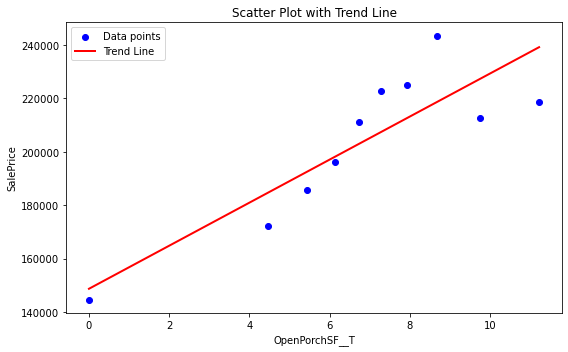

In [141]:
nth_trans = 0
dataout = linear_reg_v1.trasnformation_apply (data_4, impute_mv_cont,var,r2_data_all_trans,nth_trans,target)
data_4[var+'__T'] = dataout[var+'__T'].copy()

##### Numerical Variable transformation ends here

In [143]:
data_4.shape

(1460, 87)

In [145]:
os.getcwd()

'C:\\Users\\Sandeep\\Practice\\Linear_regression\\src'

In [146]:
data_4.to_csv("C:\\Users\\Sandeep\\Practice\\Linear_regression\\output_1.csv")

#### Categorical Variable

In [14]:
data_4 = pd.read_csv("C:\\Users\\Sandeep\\Practice\\Linear_regression\\output_1.csv")

In [15]:
cat_var = [var for var in cat_var if var in data_4.columns]

In [16]:
r2_score = linear_reg_v1.cat_var_importance(data_4,cat_var,target,impute_mv_cat)

In [17]:
cat_var_top10 = r2_score['var'][:10].to_list()

In [18]:
cat_var_top10

['ExterQual',
 'BsmtQual',
 'KitchenQual',
 'GarageFinish',
 'FireplaceQu',
 'Foundation',
 'GarageType',
 'BsmtFinType1',
 'HeatingQC',
 'MasVnrType']

In [20]:
data_4 = linear_reg_v1.cat_transformation(data_4,cat_var_top10,impute_mv_cat)

BsmtQual
GarageFinish
FireplaceQu
GarageType
BsmtFinType1
MasVnrType


In [21]:
data_4.head()

,Unnamed: 0,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,0,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,1,0,0
1,1,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,0,0,1,0
2,2,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,1,0,0
3,3,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,1,0,0,0,1,0
4,4,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,0,1,0,0


In [22]:
data_4.to_csv("C:\\Users\\Sandeep\\Practice\\Linear_regression\\output_2.csv")

#### Transformation end here